# 2. Visualitation

In this notebook, I will plot different graphis to understant the data and its seasonality.

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

# Set Default Fonts
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Arial", "Tahoma"]

# Set Default font sizes
small_size = 12
medium_size = 14
large_size = 16

# # Change the font size for individual elements
matplotlib.rc("font", size=small_size)  # controls default text sizes
matplotlib.rc("axes", titlesize=small_size)  # fontsize of the axes title
matplotlib.rc("axes", labelsize=medium_size)  # fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=small_size)  # fontsize of the tick labels
matplotlib.rc("ytick", labelsize=small_size)  # fontsize of the tick labels
matplotlib.rc("legend", fontsize=small_size)  # legend fontsize
matplotlib.rc("axes", titlesize=large_size)  # title fontsize

In [3]:
summed_data = pd.read_parquet("../data/02_intermediate/summed_data.parquet")
data = pd.read_parquet("../data/02_intermediate/data.parquet")
data

,settlement_period,period_hour,tsd,is_holiday
settlement_date,,,,
2009-01-01 00:00:00,1,0:00:00,38704,1
2009-01-01 00:30:00,2,0:30:00,38964,1
2009-01-01 01:00:00,3,1:00:00,38651,1
2009-01-01 01:30:00,4,1:30:00,37775,1
2009-01-01 02:00:00,5,2:00:00,37298,1
...,...,...,...,...
2023-04-25 21:30:00,44,21:30:00,31142,0
2023-04-25 22:00:00,45,22:00:00,29292,0
2023-04-25 22:30:00,46,22:30:00,27807,0


Two differents ways of plotting the same graphic.
1. In the first plot, we differentiate the normal days from the holidays, but since we have 48 observations per day, it appears to be straight lines.
2. We do the plot, differentiating the normal days from the holidays, but plot the summed values of each day.

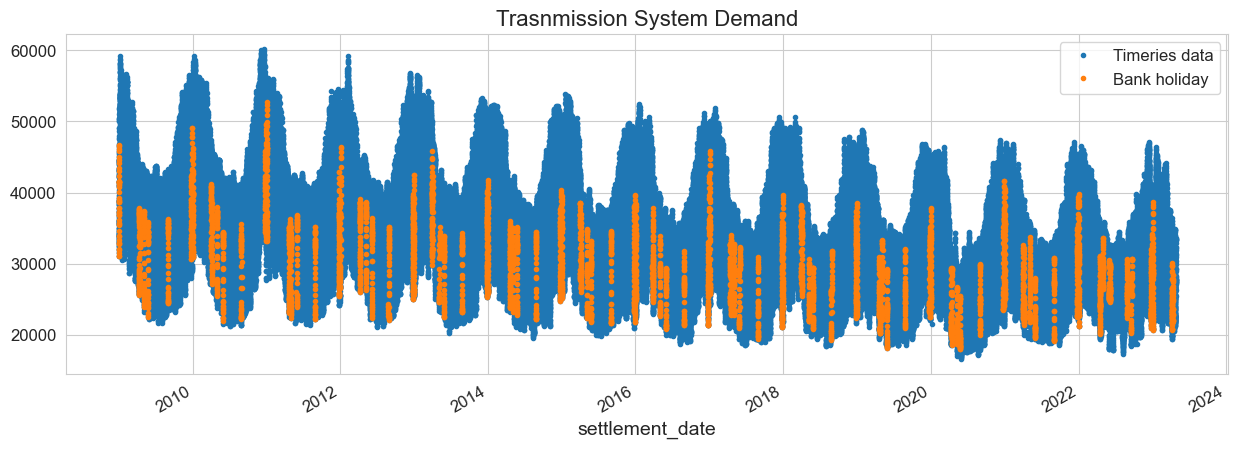

In [4]:
fig, ax = plt.subplots(figsize=(15, 5))
data["tsd"].plot(style=".", ax=ax, title="Trasnmission System Demand", label="Timeries data")

(data[data['is_holiday']==1])['tsd'].plot(style=".", ax=ax, label="Bank holiday")
ax.legend();

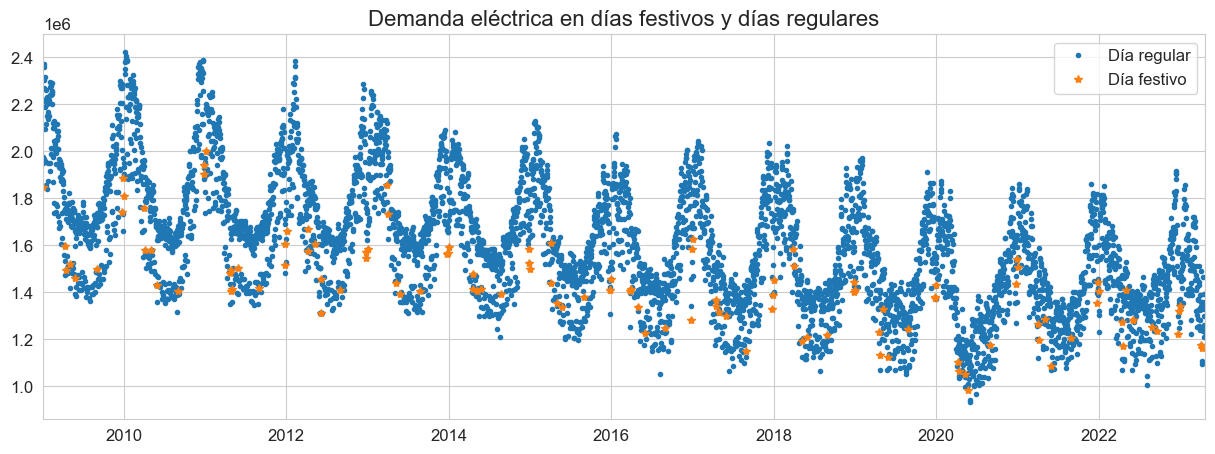

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
summed_data["tsd"].plot(style=".", ax=ax, title="Demanda eléctrica en días festivos y días regulares", label="Día regular")

(summed_data[summed_data['is_holiday']==1])['tsd'].plot(style="*", ax=ax, label="Día festivo")
ax.legend();
ax.set_xlabel('')
plt.savefig("../graphs/hday.png")

Now we do a plot for a week.

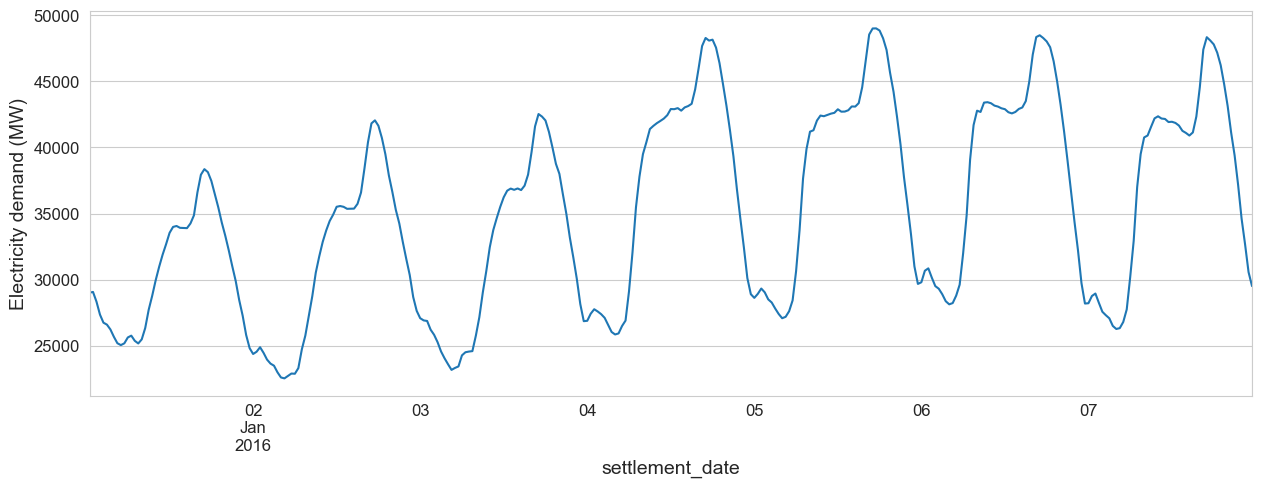

In [6]:
data.loc[(data.index > "01-01-2016") & (data.index < "01-08-2016")]["tsd"].plot(
    figsize=(15, 5), ylabel="Electricity demand (MW)"
);

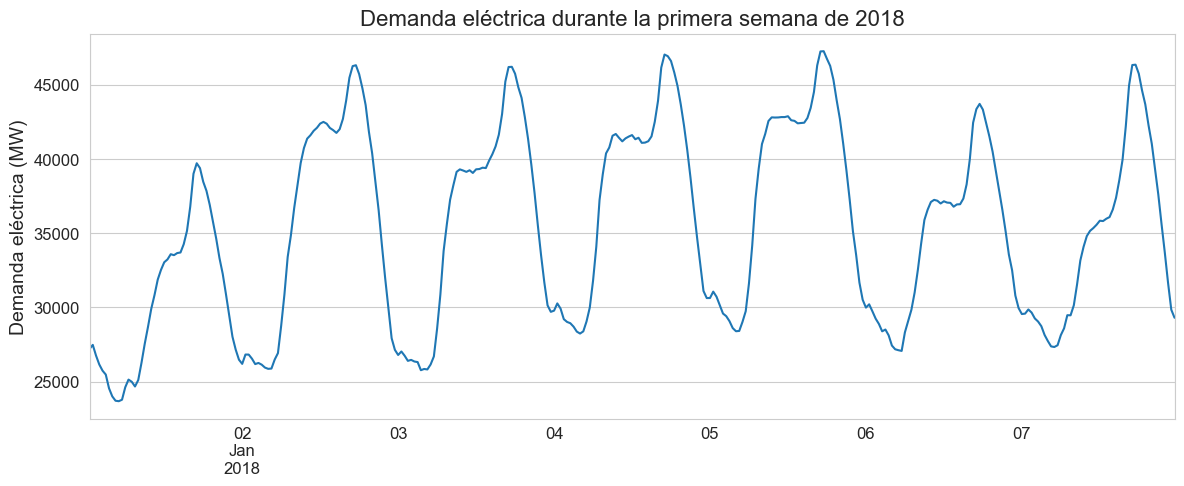

In [20]:
figure, ax = plt.subplots(figsize=(14,5))

data.loc[(data.index > "01-01-2018") & (data.index < "01-08-2018")]["tsd"].plot(ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Demanda eléctrica (MW)')
ax.set_title('Demanda eléctrica durante la primera semana de 2018')
plt.savefig("../graphs/weekplot.png")

### Other plots

We will use a function to add more columns so it will be easier to to the plots.

In [24]:
def create_features(df):
    """
    Create time series features based on time series index

    Args:
        - df: time series dataframe

    Returns:
        - df: time series dataframe with new features
    """
    df = df.copy()
    df["day_of_month"] = df.index.day
    df["day_of_week"] = df.index.day_of_week
    df["day_of_year"] = df.index.day_of_year
    df["month"] = df.index.month
    df["year"] = df.index.year
    return df

In [25]:
data = create_features(data)
data

,settlement_period,period_hour,tsd,is_holiday,day_of_month,day_of_week,day_of_year,month,year
settlement_date,,,,,,,,,
2009-01-01 00:00:00,1,0:00:00,38704,1,1,3,1,1,2009
2009-01-01 00:30:00,2,0:30:00,38964,1,1,3,1,1,2009
2009-01-01 01:00:00,3,1:00:00,38651,1,1,3,1,1,2009
2009-01-01 01:30:00,4,1:30:00,37775,1,1,3,1,1,2009
2009-01-01 02:00:00,5,2:00:00,37298,1,1,3,1,1,2009
...,...,...,...,...,...,...,...,...,...
2023-04-25 21:30:00,44,21:30:00,31142,0,25,1,115,4,2023
2023-04-25 22:00:00,45,22:00:00,29292,0,25,1,115,4,2023
2023-04-25 22:30:00,46,22:30:00,27807,0,25,1,115,4,2023


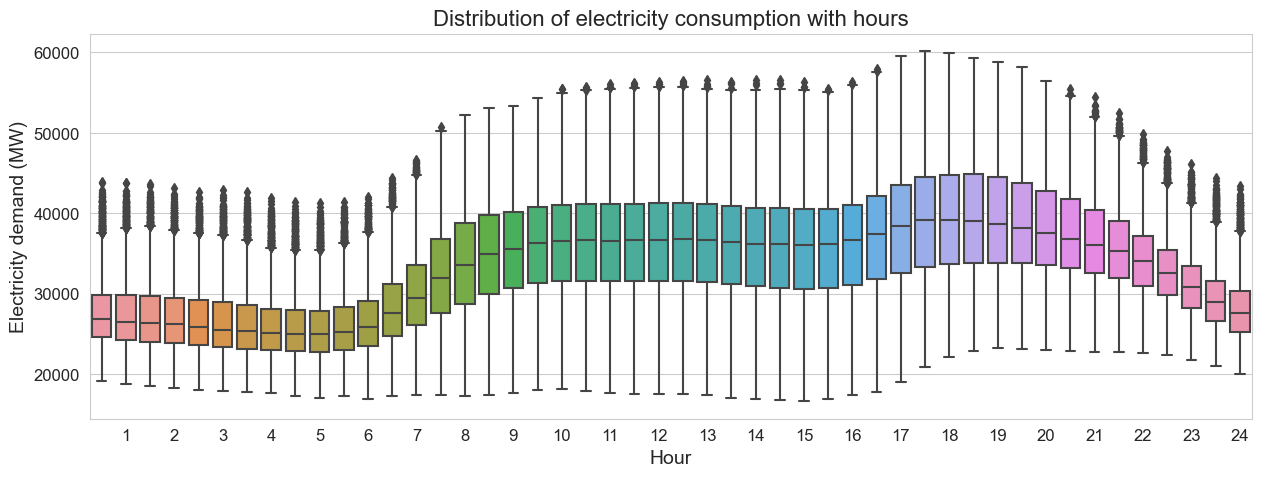

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="settlement_period", y="tsd", data=data)
ax.set_xticks(range(1, 49, 2))
ax.set_xticklabels(range(1, 25))
ax.set_xlabel("Hour")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with hours");

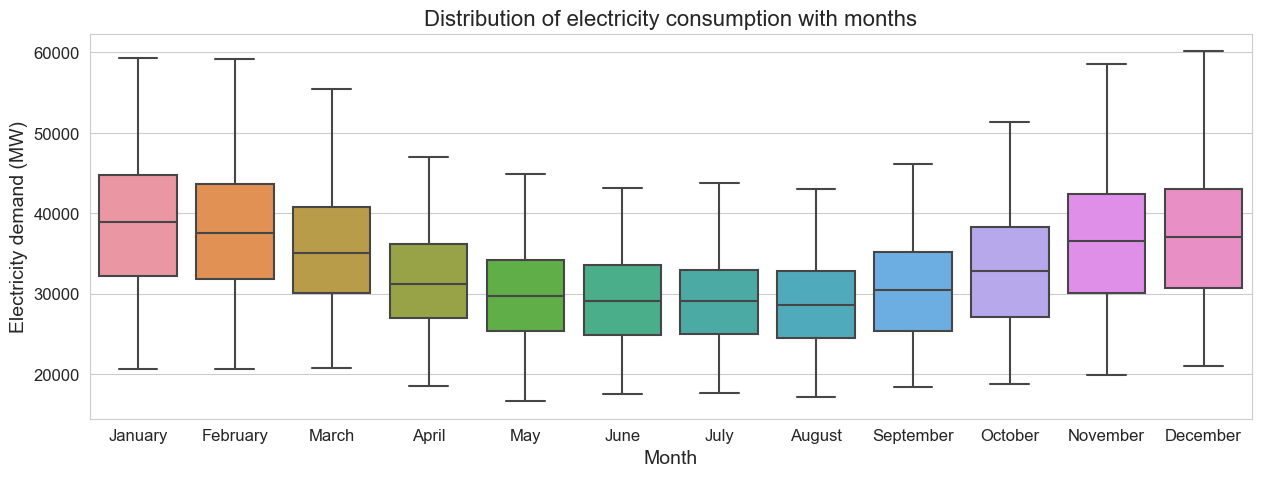

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="month", y="tsd", data=data)

ax.set_xlabel("Month")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with months");
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

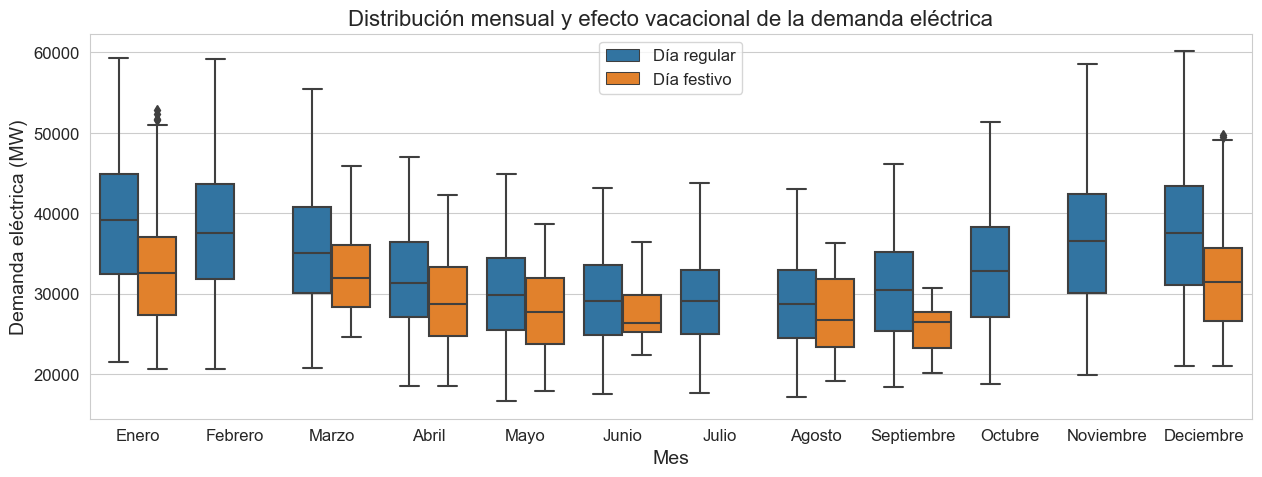

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="month", y="tsd", data=data, hue="is_holiday", ax=ax)

ax.set_xticklabels(
    ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Deciembre']
)
ax.set_xlabel("Mes")
ax.set_ylabel("Demanda eléctrica (MW)")
ax.set_title("Distribución mensual y efecto vacacional de la demanda eléctrica");
handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles, ["Día regular", "Día festivo"], loc="best")
plt.savefig("../graphs/monthplot.png")

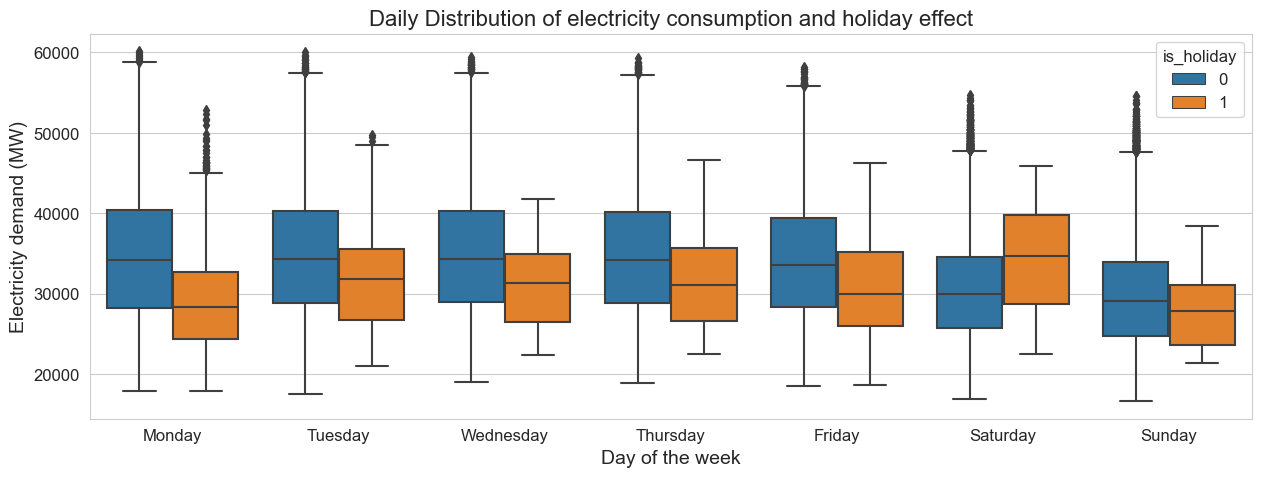

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="day_of_week", y="tsd", data=data, hue="is_holiday", ax=ax)

ax.set_xticklabels(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
ax.set_xlabel("Day of the week")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Daily Distribution of electricity consumption and holiday effect");

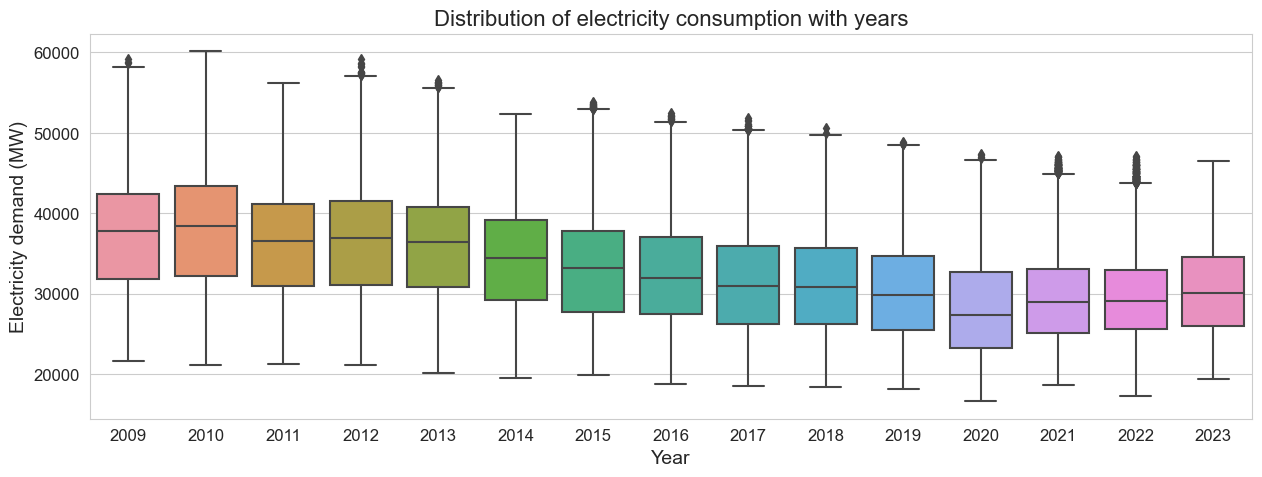

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="year", y="tsd", data=data)

ax.set_xlabel("Year")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with years");

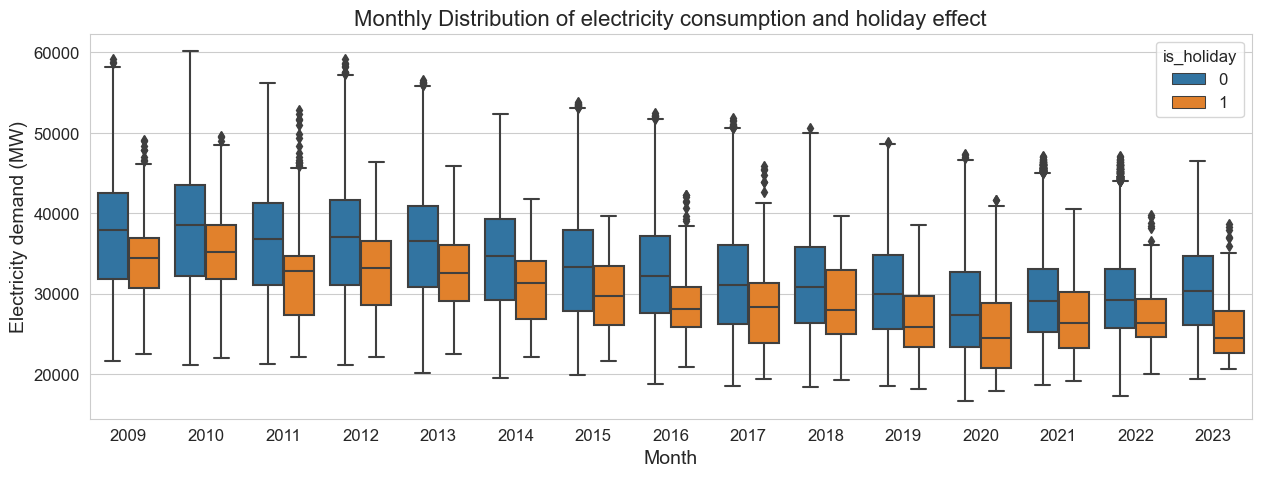

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="year", y="tsd", data=data, hue="is_holiday", ax=ax)

ax.set_xticklabels(range(2009,2024))
ax.set_xlabel("Month")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Monthly Distribution of electricity consumption and holiday effect");

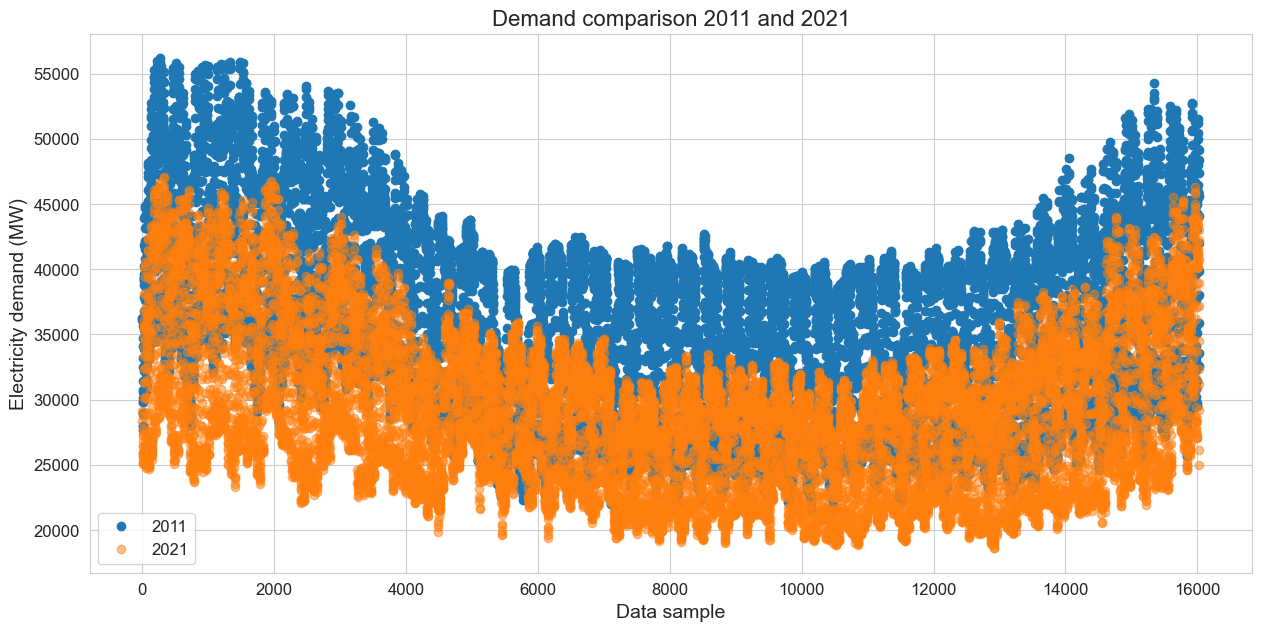

In [19]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(
    range(len(data.loc[(data.index > "01-01-2011") & (data.index < "12-01-2011")]["tsd"])),
    data.loc[(data.index > "01-01-2011") & (data.index < "12-01-2011")]["tsd"],
    "o",
    label="2011",
)

ax.plot(
    range(len(data.loc[(data.index > "01-01-2021") & (data.index < "12-01-2021")]["tsd"])),
    data.loc[(data.index > "01-01-2021") & (data.index < "12-01-2021")]["tsd"],
    "o",
    alpha=0.5,
    label="2021",
)
ax.set_xlabel("Data sample")
ax.set_ylabel("Electricity demand (MW)")
ax.legend(loc="best")
ax.set_title("Demand comparison 2011 and 2021");

##### Time series graphs

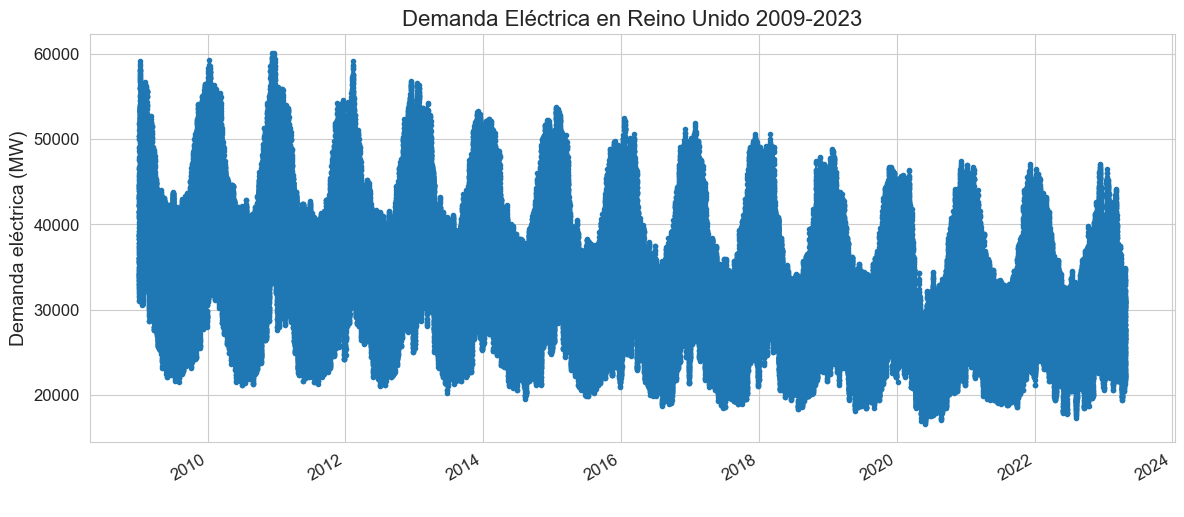

In [36]:
data["tsd"].plot(
    figsize=(14, 6), ylabel="Demanda eléctrica (MW)", xlabel=" ", title ="Demanda Eléctrica en Reino Unido 2009-2023", marker='.'
);
plt.savefig("../graphs/TimeSeries.png")

###### Stationarity

In [42]:
import statsmodels.tsa.api as sm
import scipy.stats as sc 

We apply the Box-Cox transformation to stabilize the variance of the series.

In [43]:
boxcox_trans = sc.boxcox(summed_data['tsd'])
l = boxcox_trans[1]
print('lambda = ', l)
boxcox_trans = pd.DataFrame(boxcox_trans[0], index = summed_data.index, columns = ['ts'])

lambda =  0.11634749076407709


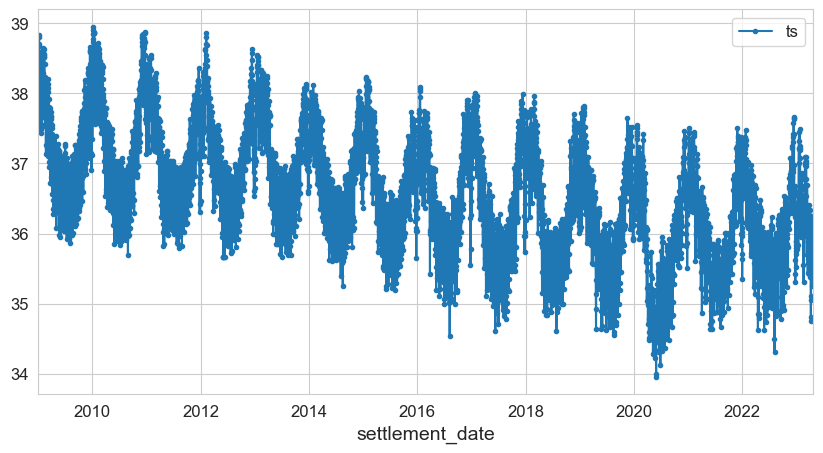

In [44]:
boxcox_trans.plot(marker='.', figsize=(10, 5))

We substract the trend and seasonal components.

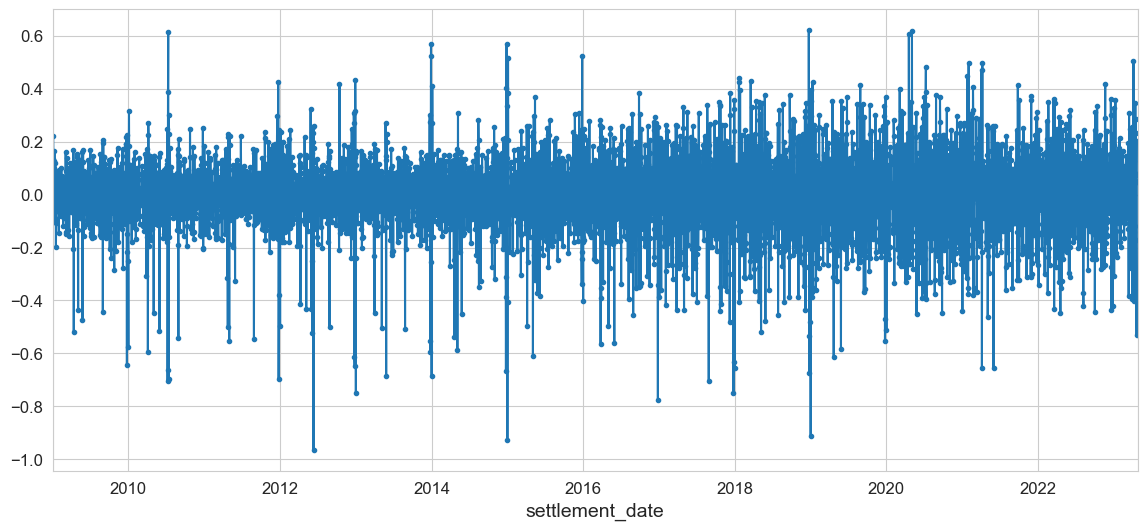

In [45]:
decom = sm.seasonal_decompose(boxcox_trans['ts'], model="additive")
decom.resid.plot(marker='.', figsize=(14, 6))

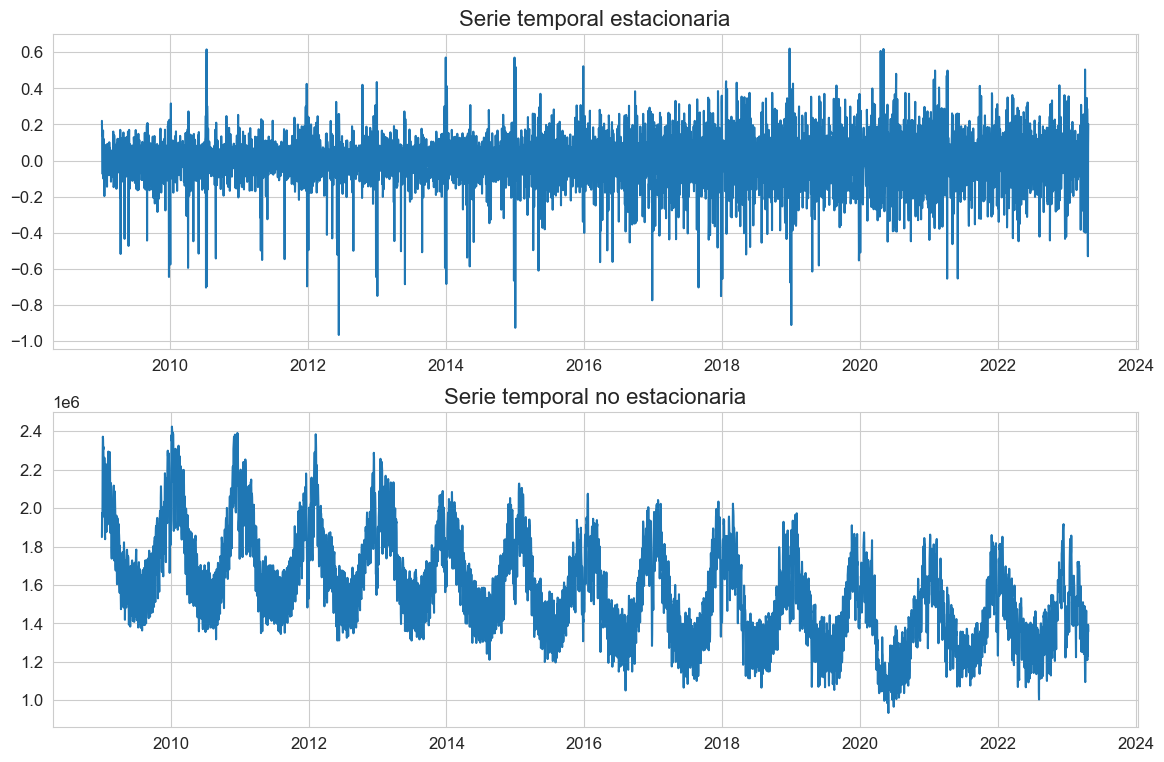

In [46]:
fig ,(ax1, ax2) = plt.subplots(2, figsize=(14, 9))
ax1.plot(decom.resid)
ax1.set_title('Serie temporal estacionaria')
ax2.plot(summed_data['tsd'])
ax2.set_title('Serie temporal no estacionaria')
plt.savefig("../graphs/Stationarity.png")

###### Decomposition of a time series

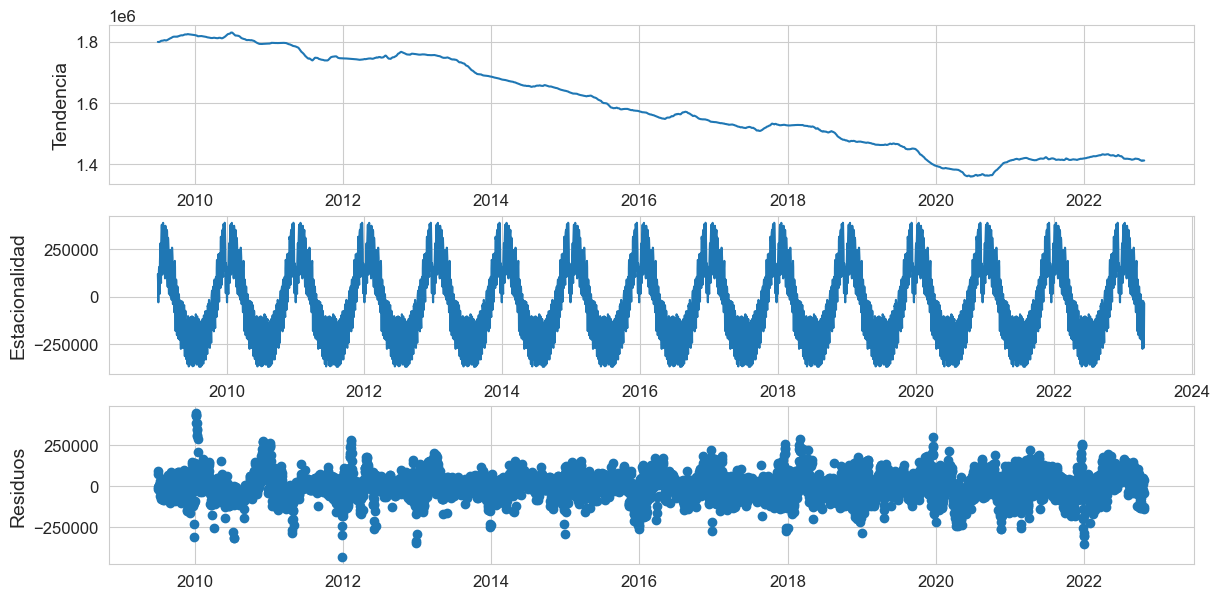

In [49]:
decompose1 = sm.seasonal_decompose(summed_data["tsd"], period=364)

fig ,( ax2, ax3, ax4) = plt.subplots(3, figsize=(14, 7))
# ax1.plot(decompose1.observed)
# ax1.set_ylabel('Original data')
ax2.plot(decompose1.trend)
ax2.set_ylabel('Tendencia')
ax3.plot(decompose1.seasonal)
ax3.set_ylabel('Estacionalidad')
ax4.plot(decompose1.resid, 'o')
ax4.set_ylabel('Residuos')

# fig.suptitle('Additive decomposition', fontsize=16)


plt.savefig("../graphs/Decomposition.png")

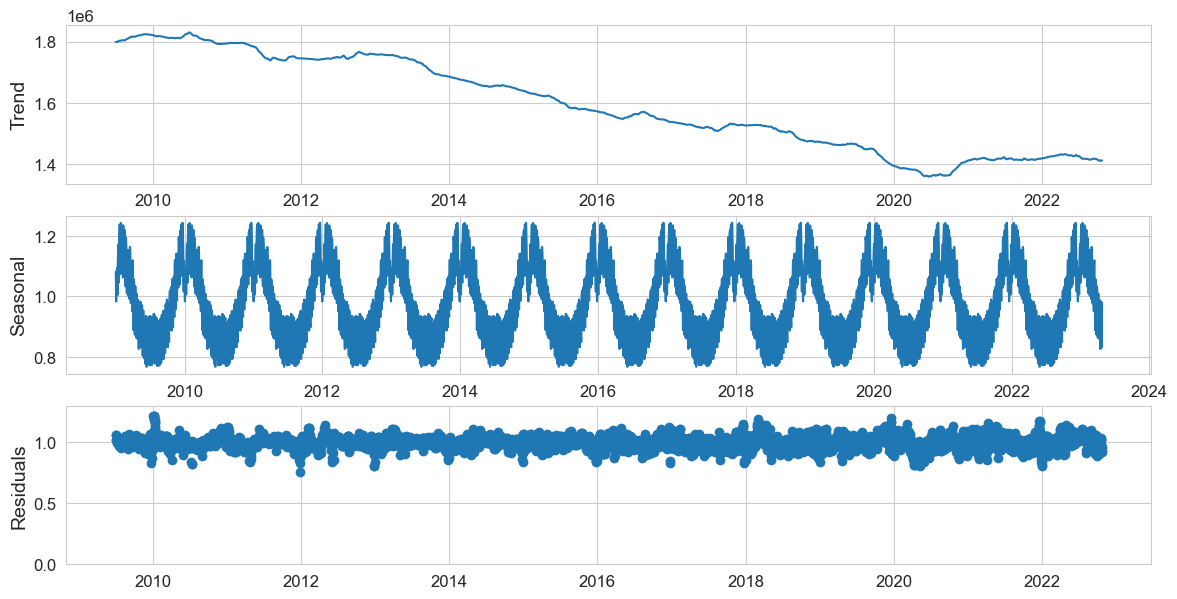

In [28]:
decompose2 = sm.seasonal_decompose(summed_data["tsd"], period=364, model='multiplicative')

fig ,( ax2, ax3, ax4) = plt.subplots(3, figsize=(14, 7))
# ax1.plot(decompose1.observed)
# ax1.set_ylabel('Original data')
ax2.plot(decompose2.trend)
ax2.set_ylabel('Trend')
ax3.plot(decompose2.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decompose2.resid, 'o')
ax4.set_ylabel('Residuals')
ax4.set_ylim((0,1.3))


plt.savefig("../graphs/Decomposition2.png")

###### ACF of a time series

In [37]:
import statsmodels.api as sm

C:\Users\mpena\anaconda3\envs\py37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


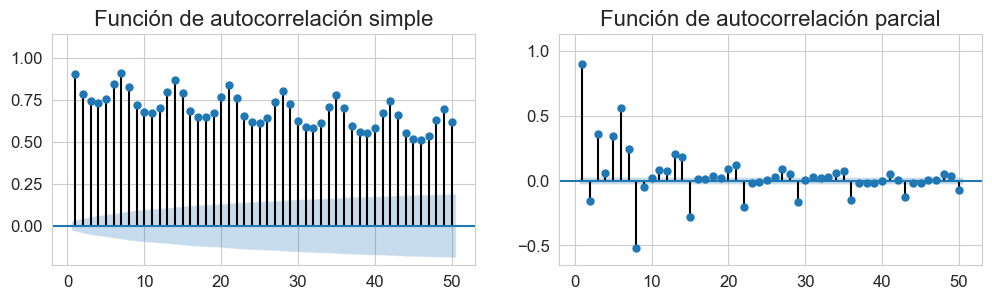

In [41]:
fig, (ax,bx) = plt.subplots(1,2,figsize=(12,3))
sm.graphics.tsa.plot_acf(summed_data['tsd'],ax=ax, auto_ylims=True, zero=False, title='Función de autocorrelación simple', lags=50)
sm.graphics.tsa.plot_pacf(summed_data['tsd'],ax=bx, auto_ylims=True, zero=False, title='Función de autocorrelación parcial', lags=50)
plt.savefig("../graphs/ACF+PACF.png")